<a href="https://colab.research.google.com/github/Abi-Lowkey/MachineLearningTasks/blob/main/UASMachineLearning/Unit_4_Multimodal_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Exploring Multimodal Text and Vision Models: Uniting Senses in AI**
Welcome to the Multimodal Text and Vision Models unit! 🌐📚👁️

In the last unit we have learned about the Transformer architecture, which revolutionized Natural Language Processing, but did not stop at the text modality. As we have seen it has begun to conquer the field of Vision (including image and video), bringing with it a wide array of new research and applications.

In this unit, we’ll focus on the data fusion possibilities that the modality-overlapping usage of Transformers has enabled and the benefitting tasks and models.

---



**Exploring Multimodality 🔎🤔💭**
Our adventure begins with understanding why blending text and images is crucial, exploring the history of multimodal models, and discovering how self-supervised learning unlocks the power of multimodality. The unit discusses about different modalities with a focus on text and vision. In this unit we will encounter three main topics:

---



**1. A Multimodal World + Introduction to Vision Language Models** These chapter serve as a foundation, enabling learners to understand the significance of multimodal data, its representation, and its diverse applications laying the groundwork for the fusion of text and vision within AI models.

In this chapter, you will:

Understand the nature of real-world multimodal data coming from various sensory inputs that are important for human decision-making.
Explore practical applications of multimodality in robotics, search , Visual Reasoning etc., showcasing their functionality and diverse applications.
Learn about diverse multimodal tasks and models focusing on Image to Text, Text to Image, VQA, Document VQA, Captioning, Visual Reasoning etc.
Conclude with an introduction on Vision Language Models and cool applications including multimodal chatbots.

---



**2. CLIP and Relatives Moving ahead**, this chapter talks about the popular CLIP model and similar vision language models. In this chapter you will:

Dive deep into CLIP’s magic, from theory to practical applications, and explore its variations.
Discover relatives like Image-bind, BLIP, and others, along with their real-world implications and challenges.
Explore the functionality of CLIP, its applications in search, zero-shot classification, and generation models like DALL-E.
Understand contrastive and non-contrastive losses and explore the self-supervised learning techniques.

**3. Transfer Learning: Multimodal Text and Vision** In the final chapter of the unit you will:

Explore diverse multimodal model applications in specific tasks, including one-shot, few-shot, training from scratch, and transfer learning, setting the stage for an exploration of transfer learning’s advantages and practical applications in Jupyter notebooks.
Engage in detailed practical implementations within Jupyter notebooks, covering tasks such as CLIP fine-tuning, Visual Question Answering, Image-to-Text, Open-set object detection, and GPT-4V-like Assistant models, focusing on task specifics, datasets, fine-tuning methods, and inference analyses.
Conclude by comparing previous sections, discussing benefits, challenges, and offering insights into potential future advancements in multimodal learning.

---



### **Visual Question Answering (VQA)**

BLIP-VQA: It is a large pre-trained model for visual question answering (VQA) tasks developed by Salesforce AI. It uses a “Bootstrapping Language-Image Pre-training” (BLIP) approach, which leverages both noisy web data and caption generation to achieve state-of-the-art performance on various vision-language tasks. You can use the BLIP in huggingface as follows:

In [3]:
from PIL import Image
from transformers import pipeline

vqa_pipeline = pipeline(
    "visual-question-answering", model="Salesforce/blip-vqa-capfilt-large"
)

image = Image.open("elephant.jpg")
question = "Is there an elephant?"

vqa_pipeline(image, question, top_k=1)

Device set to use cpu


[{'answer': 'yes'}]

Deplot: It is a one-shot visual language reasoning model trained on translating plots and charts to text summaries. This enables its integration with LLMs for answering complex questions about the data, even with novel human-written queries. DePlot achieves this by standardizing the plot-to-table translation task and leveraging Pix2Struct architecture, surpassing previous SOTA on chart QA with just a single example and LLM prompting. You can use the Deplot in huggingface as follows:

In [4]:
from transformers import Pix2StructProcessor, Pix2StructForConditionalGeneration
import requests
from PIL import Image

processor = Pix2StructProcessor.from_pretrained("google/deplot")
model = Pix2StructForConditionalGeneration.from_pretrained("google/deplot")

url = "https://raw.githubusercontent.com/vis-nlp/ChartQA/main/ChartQA%20Dataset/val/png/5090.png"
image = Image.open(requests.get(url, stream=True).raw)

inputs = processor(
    images=image,
    text="Generate underlying data table of the figure below:",
    return_tensors="pt",
)
predictions = model.generate(**inputs, max_new_tokens=512)
print(processor.decode(predictions[0], skip_special_tokens=True))

preprocessor_config.json:   0%|          | 0.00/249 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.62k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/851k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.27M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.88k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.13G [00:00<?, ?B/s]

Legacy behavior is being used. The current behavior will be deprecated in version 5.0.0. In the new behavior, If both images and text are provided, image_processor is not a VQA processor, and `add_special_tokens` is unset, the default value of `add_special_tokens` will be changed to `False` when calling the tokenizer. To test the new behavior, set `legacy=False`as a processor call argument.


Arial.TTF:   0%|          | 0.00/276k [00:00<?, ?B/s]

Entity | Individuals responsibility | Government's responsibility <0x0A> MEDIAN | 39.0 | 55.0 <0x0A> Germany | nan | 35.0 <0x0A> UK | 45.0 | 49.0 <0x0A> Sweden | 37.0 | 53.0 <0x0A> Denmark | 42.0 | 54.0 <0x0A> France | 38.0 | 55.0 <0x0A> Netherla nns | 40.0 | 58.0 <0x0A> Spain | 29.0 | 63.0 <0x0A> Italy | 22.0 | 74.0


VLIT: It is a Vision-and-Language Transformer (ViLT) model, utilizing a transformer architecture without convolutions or region supervision, fine-tuned on the VQAv2 dataset for answering natural language questions about images. The base ViLT model boasts a large architecture (B32 size) and leverages joint image and text training, making it effective for various vision-language tasks, particularly VQA, achieving competitive performance. You can use VLIT in HuggingFace as follows:

In [5]:
from transformers import ViltProcessor, ViltForQuestionAnswering
import requests
from PIL import Image

# prepare image + question
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)
text = "How many cats are there?"

processor = ViltProcessor.from_pretrained("dandelin/vilt-b32-finetuned-vqa")
model = ViltForQuestionAnswering.from_pretrained("dandelin/vilt-b32-finetuned-vqa")

# prepare inputs
encoding = processor(image, text, return_tensors="pt")

# forward pass
outputs = model(**encoding)
logits = outputs.logits
idx = logits.argmax(-1).item()
print("Predicted answer:", model.config.id2label[idx])

preprocessor_config.json:   0%|          | 0.00/251 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/320 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/136k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/470M [00:00<?, ?B/s]

Predicted answer: 2


**Image Captioning**

In [1]:
from transformers import pipeline

image_to_text = pipeline("image-to-text", model="nlpconnect/vit-gpt2-image-captioning")

image_to_text("https://ankur3107.github.io/assets/images/image-captioning-example.png")

# [{'generated_text': 'a soccer game with a player jumping to catch the ball '}]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.61k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/982M [00:00<?, ?B/s]

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "architectures": [
    "ViTModel"
  ],
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 224,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": true,
  "transformers_version": "4.47.1"
}

Config of the decoder: <class 'transformers.models.gpt2.modeling_gpt2.GPT2LMHeadModel'> is overwritten by shared decoder config: GPT2Config {
  "activation_function": "gelu_new",
  "add_cross_attention": true,
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "decoder_start_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "initializer_rang

tokenizer_config.json:   0%|          | 0.00/241 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/120 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

Device set to use cpu
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.


[{'generated_text': 'a soccer game with a player jumping to catch the ball '}]

In [2]:
import requests
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-large")
model = BlipForConditionalGeneration.from_pretrained(
    "Salesforce/blip-image-captioning-large"
)

img_url = "https://storage.googleapis.com/sfr-vision-language-research/BLIP/demo.jpg"
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert("RGB")

# conditional image captioning
text = "a photography of"
inputs = processor(raw_image, text, return_tensors="pt")

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

# unconditional image captioning
inputs = processor(raw_image, return_tensors="pt")

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

preprocessor_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/527 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.60k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

a photography of a woman and her dog on the beach
woman sitting on the beach with her dog and a cell phone


In [3]:
from transformers import AutoProcessor, AutoModelForCausalLM
import requests
from PIL import Image

processor = AutoProcessor.from_pretrained("microsoft/git-base-coco")
model = AutoModelForCausalLM.from_pretrained("microsoft/git-base-coco")

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

pixel_values = processor(images=image, return_tensors="pt").pixel_values

generated_ids = model.generate(pixel_values=pixel_values, max_length=50)
generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print(generated_caption)

preprocessor_config.json:   0%|          | 0.00/503 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/453 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/2.82k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/707M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

Legacy behavior is being used. The current behavior will be deprecated in version 5.0.0. In the new behavior, if both images and text are provided, the last token (EOS token) of the input_ids and attention_mask tensors will be removed. To test the new behavior, set `legacy=False`as a processor call argument.


two cats sleeping on a pink blanket next to remotes.


In [4]:
from PIL import Image
import requests

from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

inputs = processor(
    text=["a photo of a cat", "a photo of a dog"],
    images=image,
    return_tensors="pt",
    padding=True,
)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
probs = logits_per_image.softmax(
    dim=1
)  # we can take the softmax to get the label probabilities

config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

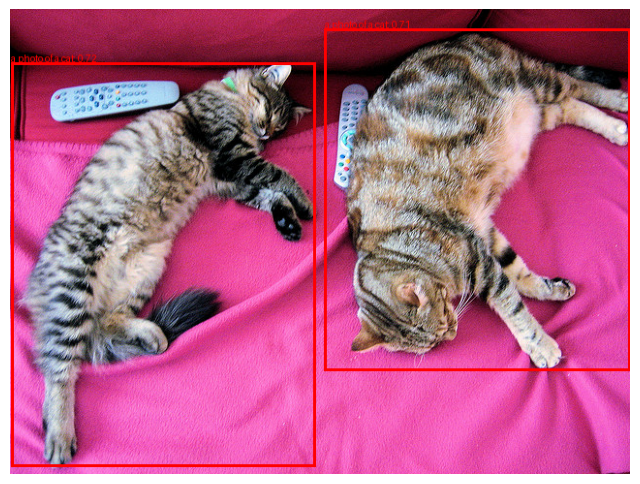

In [9]:
import requests
from PIL import Image, ImageDraw
import torch
import matplotlib.pyplot as plt

from transformers import OwlViTProcessor, OwlViTForObjectDetection

# Load processor and model
processor = OwlViTProcessor.from_pretrained("google/owlvit-base-patch32")
model = OwlViTForObjectDetection.from_pretrained("google/owlvit-base-patch32")

# Load an example image
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)
texts = [["a photo of a cat", "a photo of a dog"]]

# Prepare inputs and process
inputs = processor(text=texts, images=image, return_tensors="pt")
outputs = model(**inputs)

# Convert outputs to COCO API
target_sizes = torch.Tensor([image.size[::-1]])
results = processor.post_process_object_detection(
    outputs=outputs, threshold=0.1, target_sizes=target_sizes
)

# Retrieve predictions
i = 0  # First image in batch
text = texts[i]
boxes, scores, labels = results[i]["boxes"], results[i]["scores"], results[i]["labels"]

# Draw bounding boxes on the image
draw = ImageDraw.Draw(image)
for box, score, label in zip(boxes, scores, labels):
    box = [round(coord, 2) for coord in box.tolist()]
    draw.rectangle(box, outline="red", width=3)
    draw.text((box[0], box[1] - 10), f"{text[label]}: {round(score.item(), 2)}", fill="red")

# Display the image with bounding boxes
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis("off")
plt.show()
